In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable
from matplotlib.patches import Patch  # Per creare elementi di legenda personalizzati

In [2]:
def plot_boxplot(data_for, data_parallel_for, data_openmp, title):
    fig, ax = plt.subplots(figsize=[10, 8])

    boxs = []
    ticks = []
    colors = []

    # Primo box: versione sequenziale
    boxs.append(data_for)
    ticks.append("for")
    colors.append("orange")

    # Aggiungi coppie (parallel_for, openmp) per ogni numero di thread
    for i in range(len(data_parallel_for)):
        boxs.append(data_parallel_for[i])
        boxs.append(data_openmp[i])
        # Etichette duplicate, ma le rendiamo visivamente chiare
        ticks.append(f"{n_threads[i]}")  
        ticks.append(f"{n_threads[i]}")  
        colors.extend(["skyblue", "lightgreen"])

    # Crea il boxplot
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    # Applica colori ai box
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Etichette e titolo
    ax.set_xlabel('Threads')
    ax.set_ylabel('Microseconds')
    ax.set_title(title, loc='left')
    ax.set_xticks(range(1, len(boxs) + 1))
    ax.set_xticklabels(ticks, rotation=30)
    ax.set_yscale('log')

    # Legenda
    legend_handles = [
        Patch(facecolor='orange', label='for (sequential)'),
        Patch(facecolor='skyblue', label='parallel_for'),
        Patch(facecolor='lightgreen', label='OpenMP')
    ]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.7, 0.9, f"threadpool: size_queue({size_queue})\nmatrix size: {n_size}x{n_size}\ngranularity: {granularity}\nruns:{len(dati_parallel[0])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Calcolo e stampa delle mediane ---
    medians = [np.median(d) for d in boxs]
    print("\n=== BOX PLOT MEDIANS ===")
    print(f"{'Label':<15} | {'Median (µs)':>12}")
    print("-" * 30)

    print(f"{'for':<15} | {medians[0]:>12.2f}")
    idx = 1
    for i in range(len(data_parallel_for)):
        print(f"parallel_for (th={n_threads[i]}): {medians[idx]:>10.2f} µs")
        print(f"OpenMP       (th={n_threads[i]}): {medians[idx+1]:>10.2f} µs")
        idx += 2
    print("=" * 30 + "\n")

In [3]:
def plot_speedup(dati_parallel,dati_openmp,title,threads): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    parallel_median = [np.median(datum) for datum in dati_parallel]
    speedup_parallel = np.zeros(len(threads))

    openmp_median = [np.median(datum) for datum in dati_openmp]
    speedup_openmp = np.zeros(len(threads))


    for i in range(len(threads)):
        speedup_parallel[i] = parallel_median[0]/parallel_median[i+1]
        speedup_openmp[i] = openmp_median[0]/openmp_median[i+1]

    ax.plot(threads,speedup_parallel,'o--')
    ax.plot(threads,speedup_openmp,'x--')

    ax.legend(['speedup_threadpool','speedup_OpenMP'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(threads)
    ax.set_xticklabels(threads, rotation = 45)


    ax.set(xlabel = 'Threads',ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: size_queue({size_queue})\nmatrix size: {n_size}x{n_size}\ngranularity: {granularity}\nruns:{len(dati_parallel[0])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Stampa speedup ---
    print("\n=== SPEEDUP VALUES ===")
    for i, t in enumerate(threads):
        print(f"{t} threads -> threadpool: {speedup_parallel[i]:.2f} | OpenMP: {speedup_openmp[i]:.2f}")
    print("=======================\n")

## prestazioni parallel_for al variare di granularity

In [4]:
#set parameter
n_runs = 50
n_size = 6000 #costo singola iterazione
n_threads = [1,2,4,8,16,32,64] #,96]
size_queue = 1024
granularity = -1

In [6]:
# for
dati_for = [367328 ,366004 ,365951 ,390036 ,416668 ,364896 ,411323 ,364453 ,364063 ,368965 ,436875 ,365149 ,367116 ,410129 ,365083 ,364854 ,366474 ,365805 ,418662 ,388205 ,365969 ,364653 ,370069 ,405637 ,364717 ,364246 ,364777 ,366631 ,365039 ,365434]
#parallel_for
dati_parallel = []
dati_parallel_thread1 = [468995 ,370338 ,397022 ,757365 ,420363 ,507998 ,372855 ,408019 ,422628 ,372932 ,485317 ,408265 ,372326 ,728296 ,435596 ,409137 ,372482 ,372959 ,518051 ,447178 ,372391 ,372638 ,448147 ,429659 ,372763 ,565017 ,445935 ,491499 ,401940 ,372950]
dati_parallel_thread2 = [237882 ,185955 ,206888 ,300343 ,187902 ,217350 ,187010 ,187046 ,187275 ,187685 ,242959 ,217728 ,397264 ,281655 ,299217 ,212777 ,301541 ,187345 ,203533 ,211352 ,254405 ,187044 ,236520 ,237055 ,193679 ,232926 ,338879 ,317682 ,200856 ,376401]
dati_parallel_thread4 = [117210 ,191322 ,95765 ,93570 ,133601 ,172785 ,237154 ,152714 ,94248 ,94160 ,93974 ,150203 ,94106 ,93376 ,93901 ,121347 ,194974 ,94163 ,129205 ,130323 ,94011 ,103930 ,220173 ,173705 ,128196 ,116677 ,191287 ,100083 ,170460 ,232520]
dati_parallel_thread8 = [85716 ,47782 ,47804 ,47718 ,47713 ,79639 ,48912 ,48081 ,47953 ,47452 ,47823 ,47619 ,47671 ,47706 ,47495 ,97927 ,48128 ,47321 ,80093 ,95216 ,47691 ,48161 ,109970 ,92194 ,47710 ,70195 ,47907 ,65148 ,47587 ,47981]
dati_parallel_thread16 = [24834 ,23546 ,23886 ,23570 ,23631 ,23556 ,32001 ,24115 ,23664 ,44510 ,24515 ,23622 ,23549 ,23588 ,23898 ,23857 ,24114 ,24000 ,23608 ,23505 ,23766 ,23525 ,23662 ,23696 ,23590 ,23760 ,23526 ,23984 ,23733 ,44905]
dati_parallel_thread32 = [24133 ,21900 ,22326 ,22828 ,21542 ,23006 ,21561 ,23343 ,22539 ,21734 ,21786 ,21758 ,23101 ,22674 ,21800 ,23382 ,21902 ,22166 ,22930 ,21924 ,23746 ,22507 ,22327 ,22452 ,34308 ,33281 ,22714 ,22365 ,22377 ,23778]
dati_parallel_thread64 = [27011 ,26685 ,28213 ,25029 ,27612 ,23891 ,20994 ,21795 ,19649 ,16113 ,11761 ,16348 ,11807 ,12593 ,12730 ,15158 ,16245 ,15697 ,17173 ,16292 ,16434 ,16356 ,16084 ,15351 ,16119 ,16489 ,17245 ,15988 ,18053 ,17583]
dati_parallel_thread96 = []

for i in n_threads:
    dq = locals()[f"dati_parallel_thread{i}"]
    dati_parallel.append(dq) 

#openmp
dati_openMp = []
dati_openMp_thread1 = [378446 ,377314 ,378371 ,421090 ,385879 ,377669 ,377699 ,377977 ,377502 ,378398 ,377492 ,377830 ,377276 ,378090 ,377869 ,421007 ,417817 ,377405 ,377332 ,377758 ,377576 ,377906 ,399343 ,406752 ,378214 ,378417 ,377802 ,376964 ,377882 ,377809]
dati_openMp_thread2 = [192829 ,188935 ,189021 ,188835 ,188838 ,189025 ,188876 ,189051 ,188849 ,188898 ,188691 ,188849 ,188665 ,188916 ,189345 ,191804 ,255467 ,188852 ,188764 ,188628 ,188792 ,188749 ,188382 ,188508 ,188511 ,188528 ,188608 ,244944 ,189510 ,188727]
dati_openMp_thread4 = [135917 ,95934 ,96234 ,96160 ,96196 ,95499 ,96253 ,95560 ,95983 ,96005 ,95985 ,96069 ,95713 ,95852 ,95568 ,96063 ,95699 ,95617 ,95748 ,95691 ,127953 ,130154 ,96351 ,96078 ,95853 ,96203 ,95666 ,96465 ,96073 ,95942]
dati_openMp_thread8 = [49363 ,47285 ,47156 ,47253 ,47486 ,47333 ,70757 ,92786 ,48265 ,47203 ,47306 ,47127 ,47108 ,47177 ,47313 ,47254 ,47483 ,47158 ,47161 ,47089 ,47026 ,47049 ,47149 ,47253 ,47175 ,47222 ,47805 ,73673 ,65059 ,47909]
dati_openMp_thread16 = [29402 ,24767 ,24690 ,24751 ,24727 ,24599 ,24659 ,24660 ,24846 ,24739 ,24719 ,24810 ,24870 ,24984 ,24839 ,24758 ,24862 ,24732 ,24690 ,24806 ,24788 ,24767 ,24789 ,24690 ,24747 ,24938 ,24780 ,24886 ,24722 ,24765]
dati_openMp_thread32 = [14559 ,12057 ,11990 ,11929 ,11903 ,11893 ,11870 ,11892 ,11936 ,12019 ,11964 ,11913 ,12090 ,12117 ,12111 ,11989 ,11878 ,11884 ,11987 ,12013 ,12081 ,12053 ,11876 ,11878 ,11866 ,11935 ,11992 ,11960 ,11958 ,11935]
dati_openMp_thread64 = [18600 ,14541 ,11567 ,11196 ,11186 ,11194 ,11186 ,11206 ,11175 ,11134 ,11160 ,11134 ,11153 ,11166 ,11197 ,11169 ,11130 ,11120 ,11145 ,11154 ,11173 ,11177 ,11168 ,11145 ,11126 ,11130 ,11144 ,11168 ,11166 ,11174]
dati_openMp_thread96 = []

for i in n_threads:
    dq = locals()[f"dati_openMp_thread{i}"]
    dati_openMp.append(dq)


=== BOX PLOT MEDIANS ===
Label           |  Median (µs)
------------------------------
for             |    365986.50
parallel_for (th=1):  414750.00 µs
OpenMP       (th=1):  377875.50 µs
parallel_for (th=2):  217539.00 µs
OpenMP       (th=2):  188849.00 µs
parallel_for (th=4):  124771.50 µs
OpenMP       (th=4):   95995.00 µs
parallel_for (th=8):   47930.00 µs
OpenMP       (th=8):   47253.50 µs
parallel_for (th=16):   23714.50 µs
OpenMP       (th=16):   24766.00 µs
parallel_for (th=32):   22479.50 µs
OpenMP       (th=32):   11959.00 µs
parallel_for (th=64):   16395.00 µs
OpenMP       (th=64):   11168.00 µs



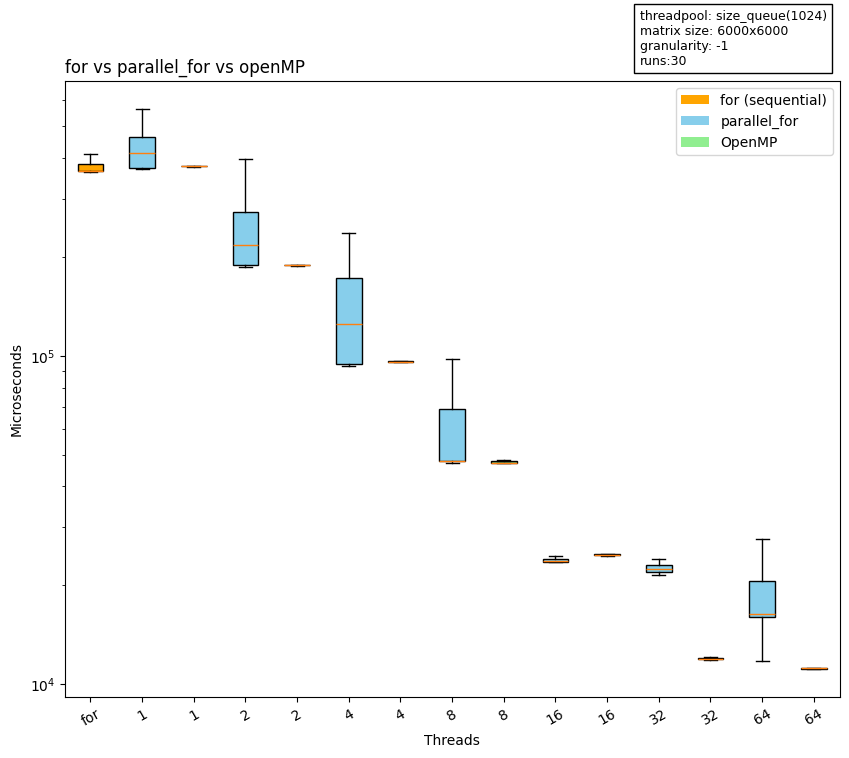

In [7]:
plot_boxplot(dati_for, dati_parallel,dati_openMp,"for vs parallel_for vs openMP")


=== SPEEDUP VALUES ===
1 threads -> threadpool: 0.88 | OpenMP: 0.97
2 threads -> threadpool: 1.68 | OpenMP: 1.94
4 threads -> threadpool: 2.93 | OpenMP: 3.81
8 threads -> threadpool: 7.64 | OpenMP: 7.75
16 threads -> threadpool: 15.43 | OpenMP: 14.78
32 threads -> threadpool: 16.28 | OpenMP: 30.60
64 threads -> threadpool: 22.32 | OpenMP: 32.77



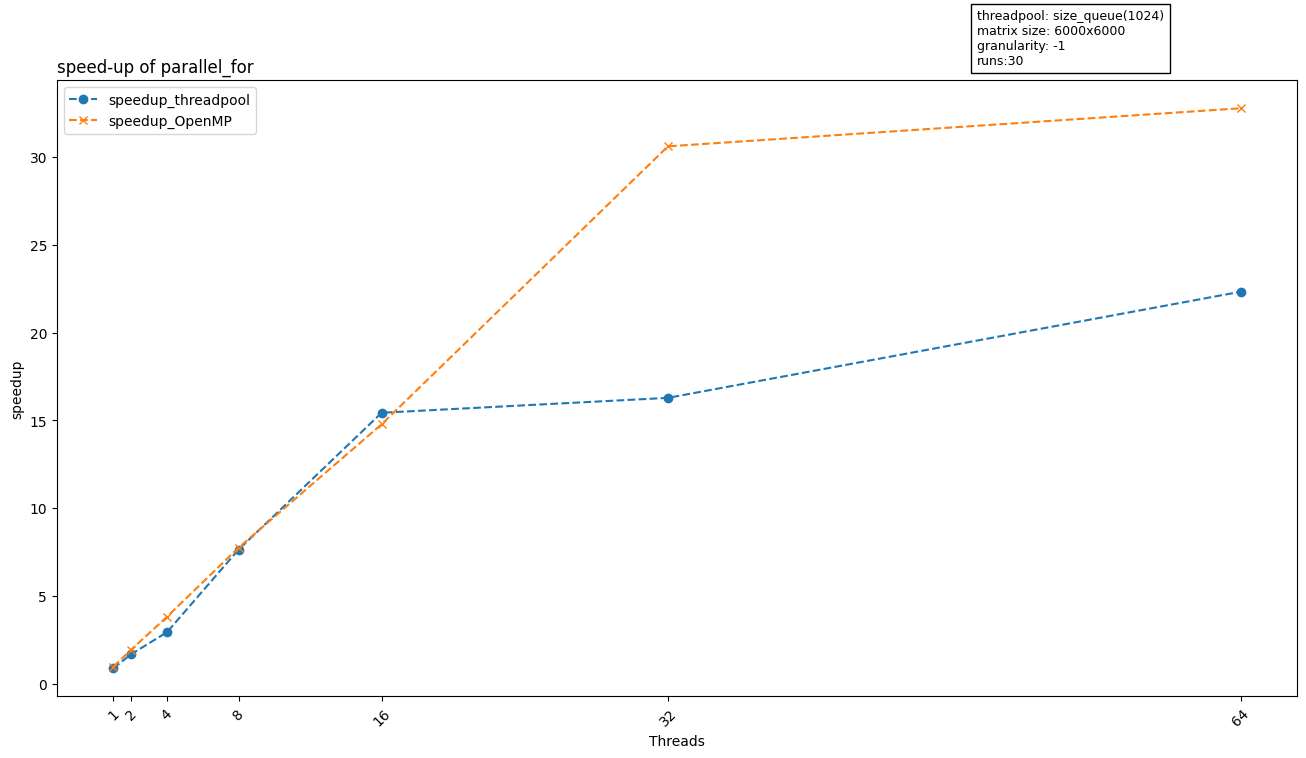

In [8]:
data_parallel = []
data_open = []
data_parallel.append(dati_for)
data_open.append(dati_for)
for i in range(len(n_threads)):
    data_parallel.append(dati_parallel[i])
    data_open.append(dati_openMp[i])

plot_speedup(data_parallel,data_open,"speed-up of parallel_for",n_threads)